## Task 1: Dataset Generation  
### Quadratic Discriminant Analysis (QDA)

**QDA Assumptions and Characteristics**  
- **Gaussian Distribution**: Each class is assumed to follow a Gaussian (normal) distribution.  
- **Different Covariance Matrices**: Unlike LDA, QDA allows each class to have its own covariance matrix.  
- **Non-linear Boundaries**: QDA can model more complex, non-linear decision boundaries.

https://www.geeksforgeeks.org/quadratic-discriminant-analysis/

https://www.kaggle.com/discussions/general/448328

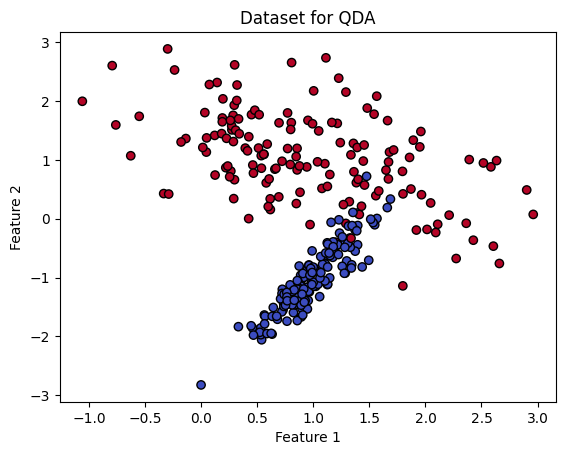

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X, y = make_classification(
    n_samples=300, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0,
    n_clusters_per_class=1, 
    n_classes=2, 
    random_state=42)

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset for QDA')
plt.show()

In [ ]:
# Initialize the QDA
qda_clf = QuadraticDiscriminantAnalysis()

# Train the classifier on the training data
qda_clf.fit(X_train, y_train)

# Evaluate the classifier's accuracy on the data
qda_accuracy = qda_clf.score(X_test, y_test)
print(f"Accuracy of QDA Classifier: {qda_accuracy:.2f}")

Accuracy of QDA Classifier: 0.95


## Why This Dataset is Good for QDA

- **QDA (Quadratic Discriminant Analysis)**:  
    - **Advantageous for QDA**: The dataset has **distinct classes** with well-separated regions, allowing QDA to model **different covariance structures** for each class effectively.
    - **Flexible Modeling**: QDA allows each class to have its own covariance matrix, making it ideal for datasets where the classes have different distributions. The separation between the two classes in this dataset benefits from QDA’s ability to handle this flexibility in covariance.

- **Other methods:**
    - **LDA** would perform worse due to shared covariance assumption.

    - **Logistic Regression** would fail to capture non-linear boundaries.

    - **Decision Trees** might overfit or approximate boundaries in a piecewise manner.

    - **SVM** with linear kernel would be insufficient; even RBF would need careful tuning.

- **Conclusion**:  
    - This dataset is a good fit for **QDA** because it allows the model to fully utilize its strength of modeling class-specific covariance structures, leading to better decision boundaries for classification.

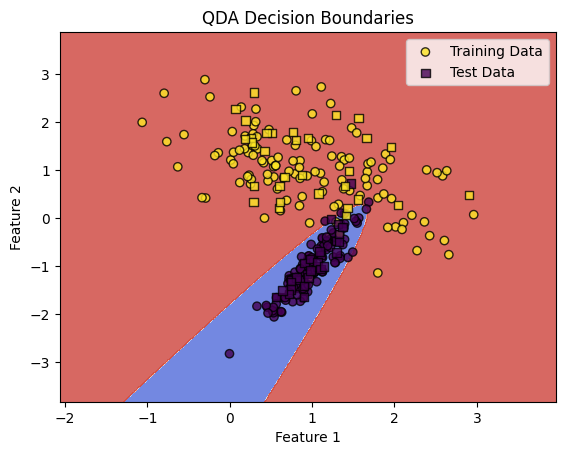

In [ ]:
# Create a mesh to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class using the classifier for each point in the mesh
Z = qda_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training Data', alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label='Test Data', alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('QDA Decision Boundaries')
plt.legend()
plt.show()

Here we can see the **confusion matrix** for this model and we observe that there are very few false predictions, for both positive and negative values, the model having a good performance on the dataset.

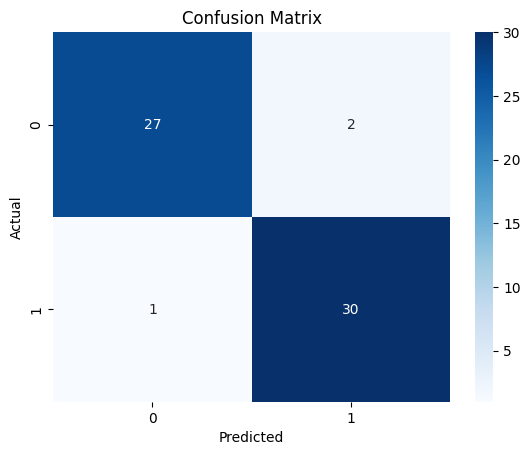

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix and plot it afterwards
cm = confusion_matrix(y_test, qda_clf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Task 2: Decision Tree Classifier  

### Decision Trees (Unpruned)

**Decision Tree Assumptions and Characteristics**  
- **Non-Parametric Model**: Decision Trees make no assumptions about the distribution of the underlying data.  
- **Hierarchical Splitting**: The model recursively splits the data into subsets based on feature values, aiming to reduce impurity at each step.  
- **Flexible and Interpretable**: Decision Trees can capture both linear and non-linear relationships. Their tree-like structure makes them highly interpretable.  
- **Overfitting**: Unpruned trees are prone to overfitting, particularly with noisy datasets or limited data.  


https://scikit-learn.org/stable/modules/tree.html

https://en.wikipedia.org/wiki/Decision_tree_learning


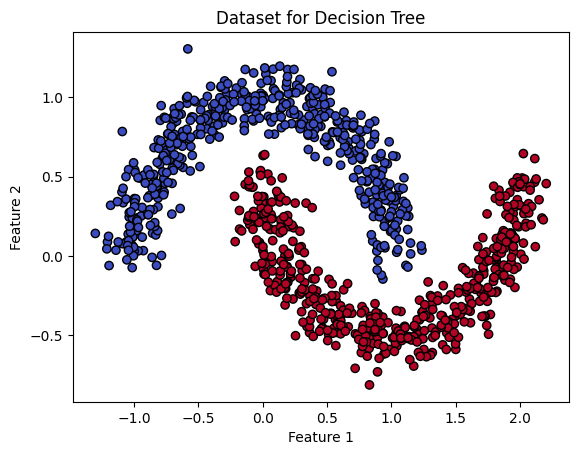

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.1, random_state=1)


# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset for Decision Tree')
plt.show()


In [ ]:
# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training data
dt_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_clf.predict(X_test)

# Evaluate the classifier's accuracy on the data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree: {accuracy:.2f}")

Accuracy of Decision Tree: 0.99


## Why This Dataset is Good for Decision Trees  

- **Complex Multi-Class Separation**:  
    - **Overlapping Regions**: The dataset contains **three distinct classes** with overlapping regions.  
    - **Region-Based Splitting**: A Decision Tree can learn region-based splits, effectively partitioning the space into decision regions, even when the boundaries are not linear.  

- **Non-Linearity**:  
    - **No Assumption of Linear Boundaries**: Unlike models that require linear or quadratic boundaries, Decision Trees do not assume any specific boundary form.  
    - **Recursive Splitting**: By recursively splitting the input space, Decision Trees can approximate complex, non-linear decision boundaries, making them suitable for datasets with non-linear class separation.

- **Other methods:**
    - **LDA** would perform poorly due to its assumption of linear boundaries and shared covariance, which doesn't match the non-linear structure of the moons dataset.

    - **Logistic Regression** would also struggle because it assumes a linear decision boundary, and cannot capture the curved separation of the classes.

    - **QDA** might perform slightly better than LDA, as it allows for class-specific covariance and can model some non-linearity, but it still lacks the flexibility to handle the complex decision boundary that Decision Trees can approximate.

    - **SVM** with a linear kernel would fail entirely due to the non-linear class structure. Even an RBF kernel could work, but would require careful tuning, while Decision Trees learn flexible splits directly without needing kernel tricks.

- **Conclusion**:  
    - This dataset is well-suited for **unpruned Decision Trees** because it enables the model to fully leverage its flexibility in creating distinct class regions through recursive binary splitting, even in the presence of complex and non-linear separations.

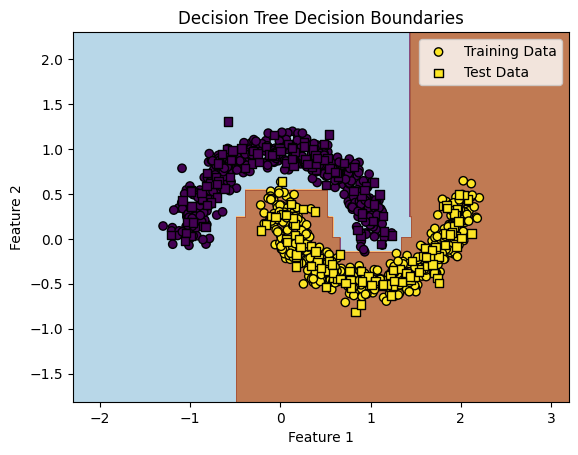

In [581]:
# Create a mesh to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class using the classifier for each point in the mesh
Z = dt_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Decision Boundaries')
plt.legend()
plt.show()

Here we can see the **confusion matrix** for this model and we observe that there are very few false predictions, for both positive and negative values, the model having a good performance on the dataset.

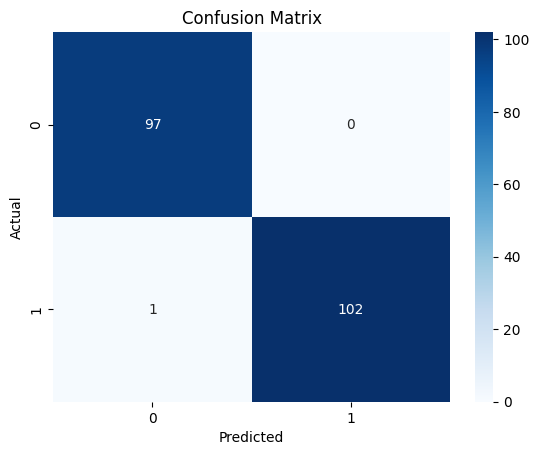

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix and plot it afterwards
cm = confusion_matrix(y_test, dt_clf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Task 3: Support Vector Machine (RBF Kernel)

### SVM with Radial Basis Function (RBF) Kernel

**SVM Characteristics and Assumptions**  
- **Margin Maximization**: SVMs aim to find the hyperplane that maximizes the margin between classes, ensuring the greatest separation between them.  
- **Kernel Trick**: The **RBF kernel** allows the SVM to map non-linearly separable data into higher dimensions, where a linear separator can be found.  
- **Robust to Overfitting**: With the right regularization and kernel settings, SVMs are highly effective at generalizing, making them robust to overfitting even with complex data.

https://scikit-learn.org/stable/modules/svm.html

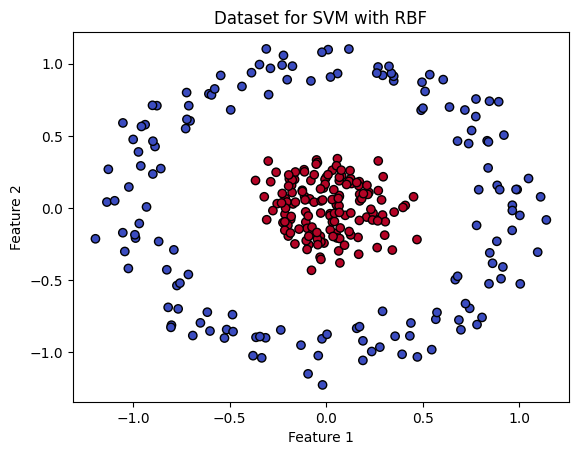

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles

# Generate synthetic data
X, y = make_circles(300, factor=0.2, noise=0.1, random_state=42)

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset for SVM with RBF')
plt.show()

In [ ]:
# Initialize and fit the SVM model with RBF kernel
svm_clf = SVC(gamma= 'auto', kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the classifier's accuracy on the data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM (RBF Kernel): {accuracy:.2f}")

Accuracy of SVM (RBF Kernel): 1.00


## Why This Dataset is Good for SVM (RBF)

- **Circular Non-Linear Pattern**:  
    - The dataset has nested circular clusters, which are not linearly separable in the original feature space.  
    - An **RBF kernel** can transform the data into a higher-dimensional space, where it becomes separable by a linear hyperplane.

- **Kernel Power**:  
    - The **RBF kernel** is highly effective at handling local decision boundaries, adjusting the decision regions with high flexibility.  
    - SVMs with RBF are particularly powerful for datasets exhibiting radial or elliptical decision boundaries, as seen in this dataset.
- **Other methods:**
    - **LDA** assumes linear boundaries and shared covariance, which fails completely on this concentric circular dataset where linear separation is impossible.

    - **Logistic Regression** is linear and cannot model the circular class boundaries, leading to high misclassification.

    - **QDA** allows for quadratic decision boundaries, but even that isn't sufficient to handle the nested ring structure — it might overfit or find elliptical shapes, but not true nested circles.

    - **Decision Trees** might be able to approximate the rings with many axis-aligned splits, but would require a very deep tree and still produce overfit boundaries that lack the smoothness of an RBF SVM.


- **Conclusion**:  
    - This dataset is a perfect example of where **SVM with RBF kernel** excels, showcasing its ability to model non-linear and nested decision boundaries effectively through kernel-based transformation.

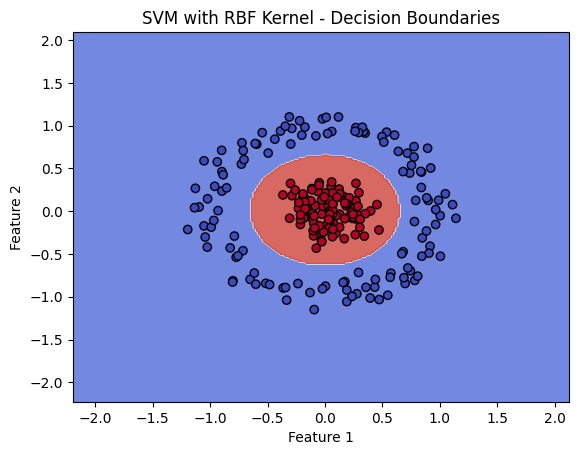

In [ ]:
# Create a mesh grid to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), 
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the mesh grid
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k', cmap=plt.cm.coolwarm)
plt.title('SVM with RBF Kernel - Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Here we can see the **confusion matrix** for this model and we observe that there are very few false predictions, for both positive and negative values, the model having a good performance on the dataset.

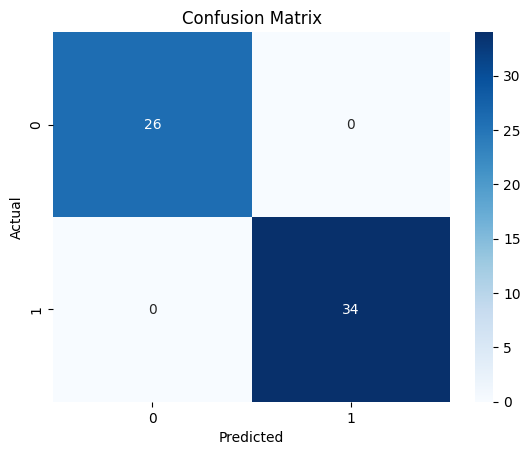

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix and plot it afterwards
cm = confusion_matrix(y_test, svm_clf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Task 2: Bias variance and model capacity

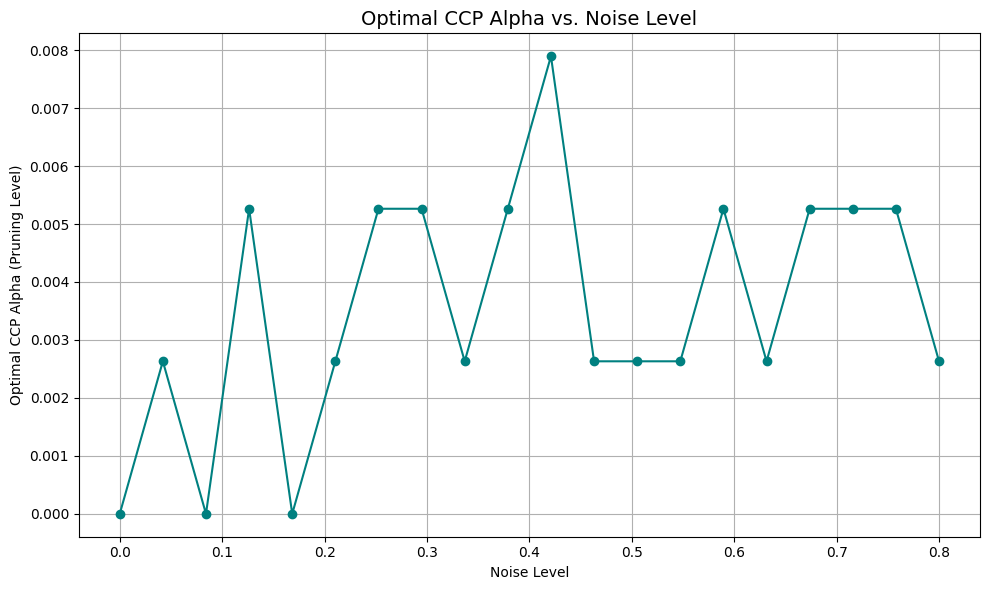

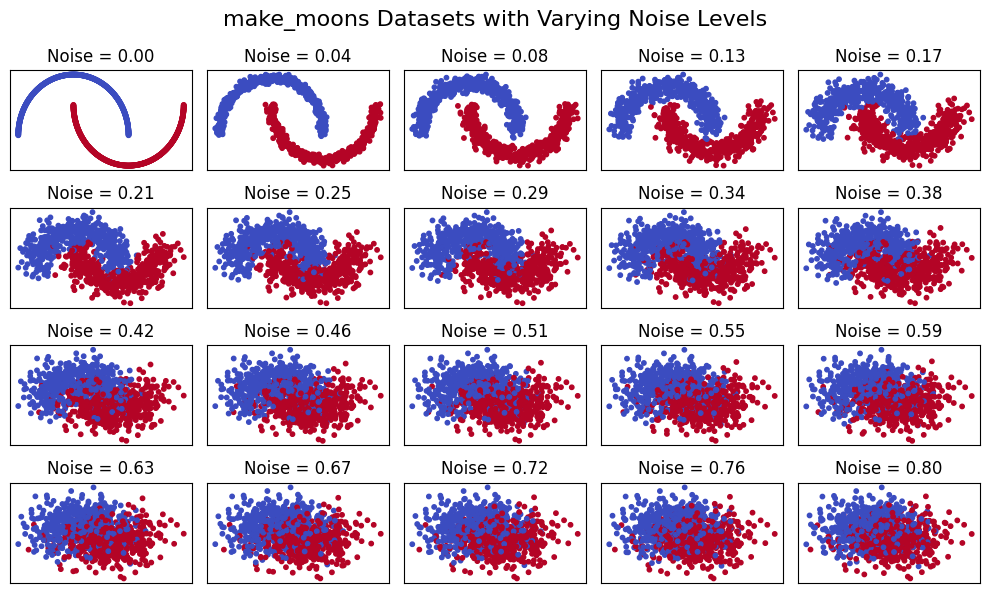

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Parameters
n_samples = 1000
noise_levels = np.linspace(0, 0.8, 20)  # Noise levels from 0 to 0.5
ccp_alpha_range = np.linspace(0, 0.05, 20)  # Candidate alpha values

best_alphas = []

# 1. Compute optimal ccp_alpha for each noise level
for noise in noise_levels:
    # Generate noisy moons
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    best_acc = 0
    best_alpha = 0

    for alpha in ccp_alpha_range:
        clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
        clf.fit(X_train, y_train)
        acc = accuracy_score(y_test, clf.predict(X_test))

        if acc > best_acc:
            best_acc = acc
            best_alpha = alpha

    best_alphas.append(best_alpha)

# 2. Plot noise level vs optimal ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, best_alphas, marker='o', color='teal')
plt.title("Optimal CCP Alpha vs. Noise Level", fontsize=14)
plt.xlabel("Noise Level")
plt.ylabel("Optimal CCP Alpha (Pruning Level)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Plot datasets at different noise levels
fig, axes = plt.subplots(4, 5, figsize=(10  , 6))
axes = axes.ravel()

for i, noise in enumerate(noise_levels):
    X, y = make_moons(n_samples=1000, noise=noise, random_state=42)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
    axes[i].set_title(f"Noise = {noise:.2f}")
    axes[i].set_xticks([])
    axes[i].set_yticks([])

fig.suptitle("make_moons Datasets with Varying Noise Levels", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

### 3. Interpretation of Results: Model Capacity, Bias, Variance, and Total Error

The experiment evaluated decision trees trained on datasets with varying noise levels using bias-variance decomposition. The following patterns were observed:

- **Model Capacity**: Decision trees are high-capacity models capable of fitting complex patterns. When noise is low, this capacity helps achieve low bias and variance. However, in the presence of noise, high capacity leads to overfitting (high variance).

- **Bias Error**:
  - At **low noise (0.00)**, the model captures the underlying pattern well, resulting in very low bias.
  - As **noise increases**, the signal becomes harder to learn, and pruning simplifies the model. This leads to a **significant increase in bias** since the model cannot fully explain the noisy or conflicting patterns.

- **Variance Error**:
  - At low noise, the tree's predictions are stable (low variance).
  - With higher noise, the model becomes more sensitive to the training data, and variance increases, but pruning helps.

- **Total Error (Expected Loss)**:
  - Grows significantly with noise due to increases in both bias and variance.
  - Bias becomes the **dominant contributor** to total error at high noise levels.

#### Summary:
In low-noise settings, decision trees perform well due to their high capacity. As noise increases, the same capacity leads to overfitting, and even with pruning, both **bias and variance** increase — with **bias contributing most to total error** at high noise levels.

In [597]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np

# Select 3 noise levels (low, medium, high)
noise_levels = np.linspace(0, 0.8, 20)
selected_noise_indices = [0, 10, 19]
selected_noise_levels = [noise_levels[i] for i in selected_noise_indices]
selected_alphas = [best_alphas[i] for i in selected_noise_indices]

for noise, alpha in zip(selected_noise_levels, selected_alphas):
    print(f"Noise Level: {noise:.2f}, CCP Alpha: {alpha:.4f}")
    
    # Generate dataset
    X, y = make_moons(n_samples=1000, noise=noise, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y)

    # Decision tree with optimal alpha
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test,
        loss='0-1_loss',
        random_seed=42
    )

    # Print average for each noise level
    print(f"Average expected loss: {avg_expected_loss:.3f}")
    print(f"Average bias: {avg_bias:.3f}")
    print(f"Average variance: {avg_var:.3f}\n")


Noise Level: 0.00, CCP Alpha: 0.0000
Average expected loss: 0.012
Average bias: 0.010
Average variance: 0.008

Noise Level: 0.42, CCP Alpha: 0.0079
Average expected loss: 0.142
Average bias: 0.117
Average variance: 0.062

Noise Level: 0.80, CCP Alpha: 0.0026
Average expected loss: 0.335
Average bias: 0.303
Average variance: 0.193



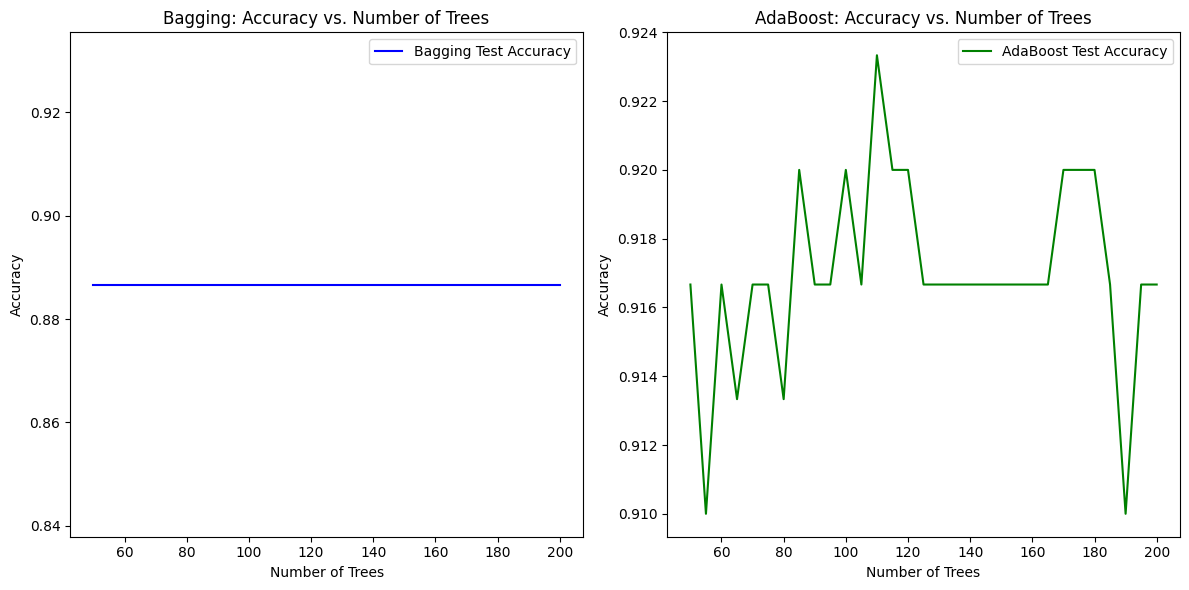

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate the moons dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split the dataset into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the base classifier for Bagging and AdaBoost
base_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Arrays to store accuracy results
bagging_accuracies = []
adaboost_accuracies = []
oob_accuracies = []

# Number of trees (estimators) to test
n_estimators_range = range(50, 201, 5)  # Testing from 50 to 200 trees, step 5

# Bagging with OOB estimates
for n_estimators in n_estimators_range:
    # Bagging Classifier with OOB score
    bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=n_estimators, oob_score=True, random_state=42)
    bagging_clf.fit(X_train, y_train)
    
    # Store accuracies
    y_pred_bagging = bagging_clf.predict(X_test)
    bagging_accuracies.append(accuracy_score(y_test, y_pred_bagging))
    oob_accuracies.append(bagging_clf.oob_score_)  # OOB error

# 2. AdaBoost
for n_estimators in n_estimators_range:
    # AdaBoost Classifier
    adaboost_clf = AdaBoostClassifier(estimator=base_clf, n_estimators=n_estimators, random_state=42)
    adaboost_clf.fit(X_train, y_train)
    
    # Store accuracy
    y_pred_adaboost = adaboost_clf.predict(X_test)
    adaboost_accuracies.append(accuracy_score(y_test, y_pred_adaboost))

# 3. Plot learning curves
plt.figure(figsize=(12, 6))

# Plot Bagging accuracy and OOB accuracy
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, bagging_accuracies, label='Bagging Test Accuracy', color='blue')
plt.plot(n_estimators_range, oob_accuracies, label='Bagging OOB Accuracy', color='red', linestyle='--')
plt.title("Bagging: Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend()

# Plot AdaBoost accuracy
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, adaboost_accuracies, label='AdaBoost Test Accuracy', color='green')
plt.title("AdaBoost: Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
